<a href="https://colab.research.google.com/github/Tony6512/Customer-Personality-Analysis/blob/main/customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


Dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

# Intro

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy
import statsmodels.api as sm
import time

# visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep="\t")

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Strip extra spaces from all string entries in the DataFrame
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [ ]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

In [ ]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

We will drop non-unique features: Z_CostContact, Z_Revenue.

In [ ]:
df.drop(columns = ['ID', 'Z_CostContact', 'Z_Revenue'], inplace = True)

In [ ]:
binary_list = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2', 'Response']
for feat in binary_list:
    # df.loc[df[feat] == 1, feat] = 'accepted'
    # df.loc[df[feat] == 0, feat] = 'otherwise'
    df[feat] = df[feat].replace({1:'accepted', 0:'otherwise'})

In [ ]:
binary_list = ['Complain']
for feat in binary_list:
    # df.loc[df[feat] == 1, feat] = 'complained'
    # df.loc[df[feat] == 0, feat] = 'otherwise'
    df[feat] = df[feat].replace({1:'complained', 0:'otherwise'})

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")

In [ ]:
earliest_date = df['Dt_Customer'].min()
df['Customer_length_days'] = (df['Dt_Customer'] - earliest_date).dt.days

In [ ]:
df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumStorePurchases  \
0  2012-09-04       58       635         88  ...                  4   
1  2014-03-08       38        11          1  ...                  2   
2  2013-08-21       26       426         49  ...                 10   
3  2014-02-10       26        11          4  ...                  4   
4  2014-01-19       94       173         43  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7     otherwise     otherwise     otherwise     otherwise   
1                  5     otherwise     otherwise     otherwise     otherwise   
2                  4     otherwise     otherwise     otherwise     otherwise   
3                  6     otherwise     otherwise     otherwise     otherwise   
4                  5     otherwise     otherwise     otherwise     otherwise   

   AcceptedCmp2   Complain   Response Customer_length_days  
0     otherwise  otherwise   accepted                   36  
1     otherwise  otherwise  otherwise                  586  
2     otherwise  otherwise  otherwise                  387  
3     otherwise  otherwise  otherwise                  560  
4     otherwise  otherwise  otherwise                  538  

[5 rows x 27 columns]

In [ ]:
df.isnull().sum()

Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Response                 0
Customer_length_days     0
dtype: int64

In [ ]:
df.isna().sum()

Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Response                 0
Customer_length_days     0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isna().sum() ## verify rows with NA have been dropped

Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Customer_length_days    0
dtype: int64

In [ ]:
df.duplicated().sum()

182

no duplicates

In [ ]:
df.drop(['Dt_Customer'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Customer_length_days'],
      dtype='object')

In [ ]:
# df["Age"] = 2021-df["Year_Birth"]
df['Total_Purchases']  = (df['NumWebPurchases']+ df['NumCatalogPurchases'] +
       df['NumStorePurchases'])

df["Spent"] = (df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]
    + df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"])

df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner",
            "Together":"Partner", "Absurd":"Alone", "Widow":"Alone",
            "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

df["Children"]=df["Kidhome"]+df["Teenhome"]

df["Family_Size"] = (df["Living_With"].replace({"Alone": 1, "Partner":2})+
                    df["Children"])

df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

df["Education"]=df["Education"].replace({"Basic":"Undergraduate",
                "2n Cycle":"Undergraduate", "Graduation":"Graduate",
                "Master":"Postgraduate", "PhD":"Postgraduate"})

to_drop = ["Marital_Status"]
df = df.drop(to_drop, axis=1)

In [ ]:
df.shape

(2216, 31)

In [ ]:
df.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2216.000000    2216.000000  2216.000000  2216.000000  2216.000000   
mean   1968.820397   52247.251354     0.441787     0.505415    49.012635   
std      11.985554   25173.076661     0.536896     0.544181    28.948352   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2216.000000  2216.000000      2216.000000      2216.000000   
mean    305.091606    26.356047       166.995939        37.637635   
std     337.327920    39.793917       224.283273        54.752082   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     2.000000        16.000000         3.000000   
50%     174.500000     8.000000        68.000000        12.000000   
75%     505.000000    33.000000       232.250000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumWebPurchases  NumCatalogPurchases  \
count       2216.000000  ...      2216.000000          2216.000000   
mean          27.028881  ...         4.085289             2.671029   
std           41.072046  ...         2.740951             2.926734   
min            0.000000  ...         0.000000             0.000000   
25%            1.000000  ...         2.000000             0.000000   
50%            8.000000  ...         4.000000             2.000000   
75%           33.000000  ...         6.000000             4.000000   
max          262.000000  ...        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  Customer_length_days  \
count        2216.000000        2216.000000           2216.000000   
mean            5.800993           5.319043            345.478791   
std             3.250785           2.425359            202.434667   
min             0.000000           0.000000              0.000000   
25%             3.000000           3.000000            170.000000   
50%             5.000000           6.000000            343.500000   
75%             8.000000           7.000000            519.000000   
max            13.000000          20.000000            699.000000   

       Total_Purchases        Spent     Children  Family_Size    Is_Parent  
count      2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean         12.557310   607.075361     0.947202     2.592509     0.714350  
std           7.204611   602.900476     0.749062     0.905722     0.451825  
min           0.000000     5.000000     0.000000     1.000000     0.000000  
25%           6.000000    69.000000     0.000000     2.000000     0.000000  
50%          12.000000   396.500000     1.000000     3.000000     1.000000  
75%          18.000000  1048.000000     1.000000     3.000000     1.000000  
max          32.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 22 columns]

In [ ]:
# df.info()

In [ ]:
df.describe(exclude = [np.number])

Education AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1  \
count       2216         2216         2216         2216         2216   
unique         3            2            2            2            2   
top     Graduate    otherwise    otherwise    otherwise    otherwise   
freq        1116         2053         2052         2054         2074   

       AcceptedCmp2   Complain   Response Living_With  
count          2216       2216       2216        2216  
unique            2          2          2           2  
top       otherwise  otherwise  otherwise     Partner  
freq           2186       2195       1883        1430

In [ ]:
df.head()

Year_Birth     Education   Income  Kidhome  Teenhome  Recency  MntWines  \
0        1957      Graduate  58138.0        0         0       58       635   
1        1954      Graduate  46344.0        1         1       38        11   
2        1965      Graduate  71613.0        0         0       26       426   
3        1984      Graduate  26646.0        1         0       26        11   
4        1981  Postgraduate  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp2   Complain  \
0         88              546              172  ...     otherwise  otherwise   
1          1                6                2  ...     otherwise  otherwise   
2         49              127              111  ...     otherwise  otherwise   
3          4               20               10  ...     otherwise  otherwise   
4         43              118               46  ...     otherwise  otherwise   

    Response  Customer_length_days  Total_Purchases  Spent  Living_With  \
0   accepted                    36               22   1617        Alone   
1  otherwise                   586                4     27        Alone   
2  otherwise                   387               20    776      Partner   
3  otherwise                   560                6     53      Partner   
4  otherwise                   538               14    422      Partner   

  Children Family_Size Is_Parent  
0        0           1         0  
1        2           3         1  
2        0           2         0  
3        1           3         1  
4        1           3         1  

[5 rows x 31 columns]

In [ ]:
print(df.columns)
print(df.columns.shape)

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Customer_length_days', 'Total_Purchases', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')
(31,)


In [ ]:
cts_feat = df.select_dtypes(include=[np.number]).columns
cts_feat

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_length_days', 'Total_Purchases', 'Spent', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

In [ ]:
cts_feat.shape

(22,)

In [ ]:
cat_feat = df.select_dtypes(include=["object"]).columns
cat_feat

Index(['Education', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Living_With'],
      dtype='object')

In [ ]:
cat_feat.shape

(9,)

# Data Exploration and Data Preparation

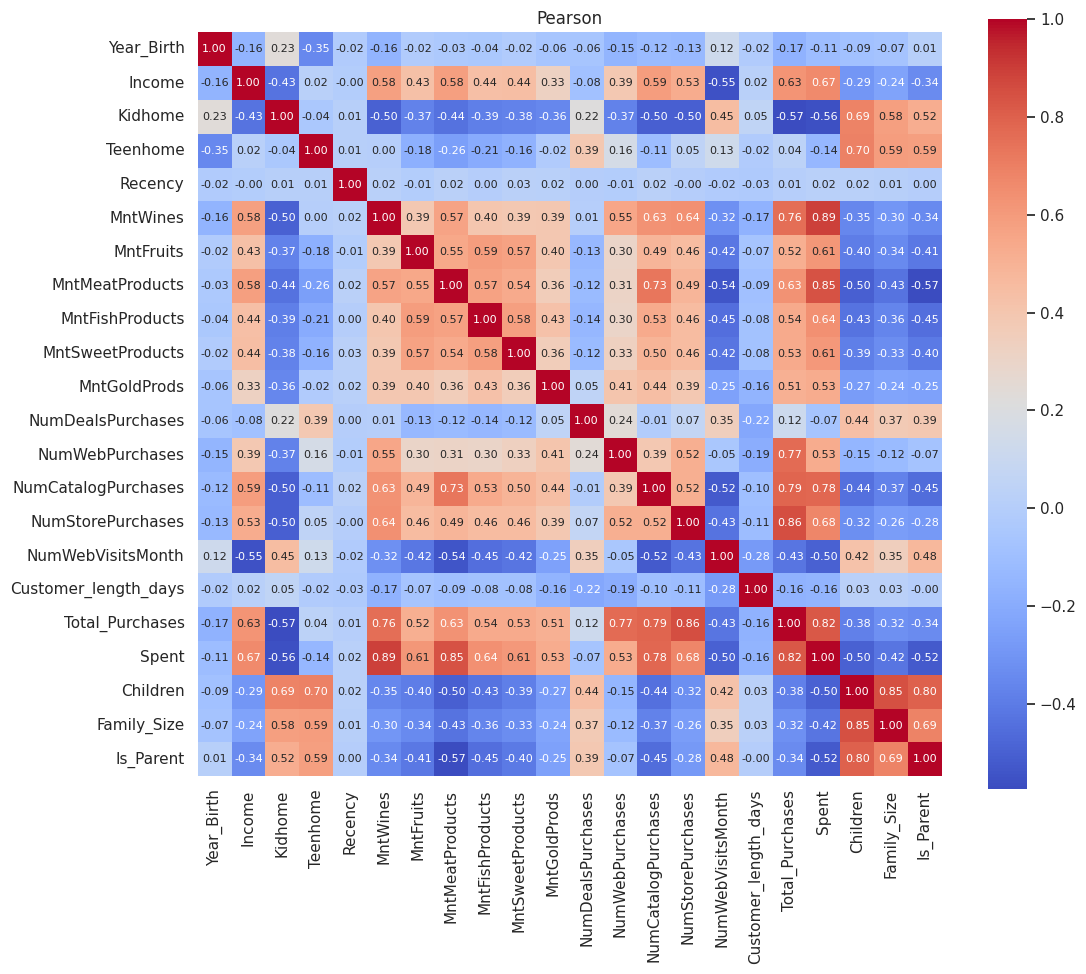

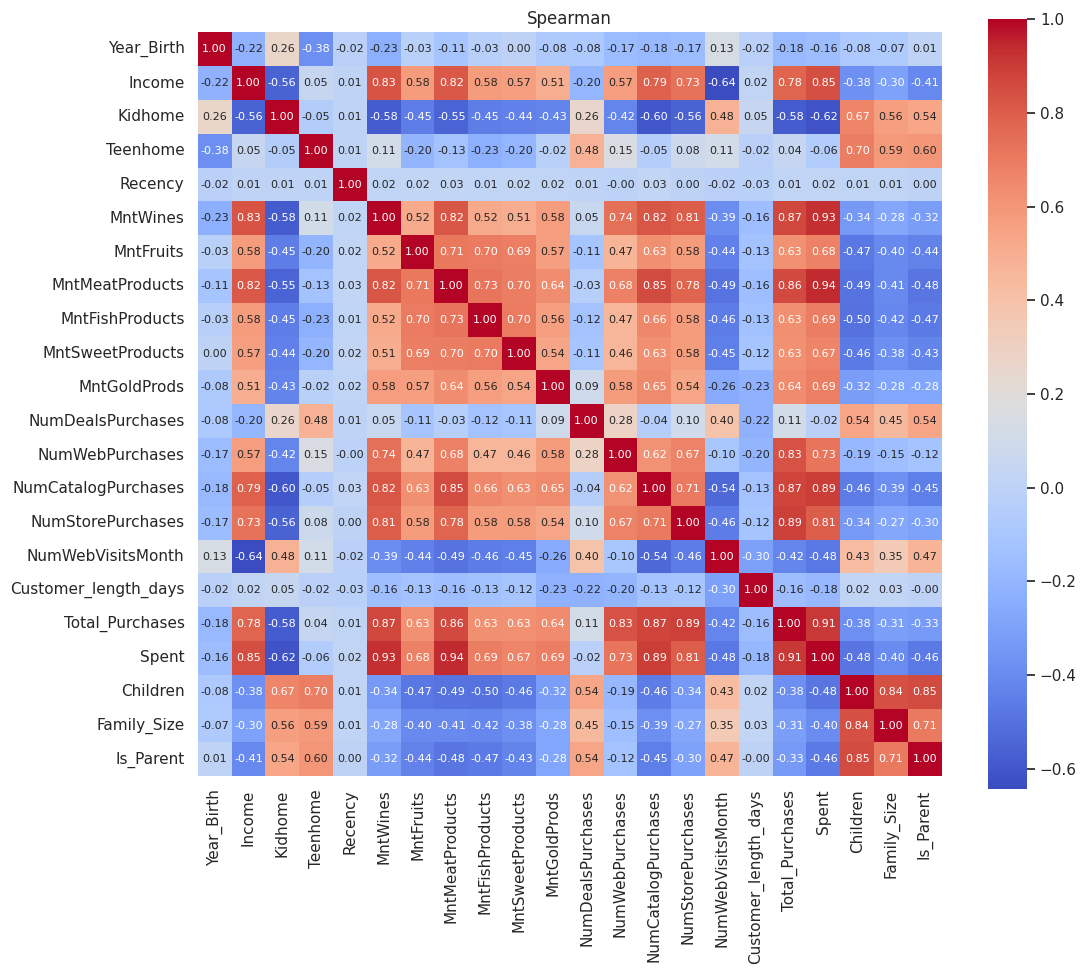

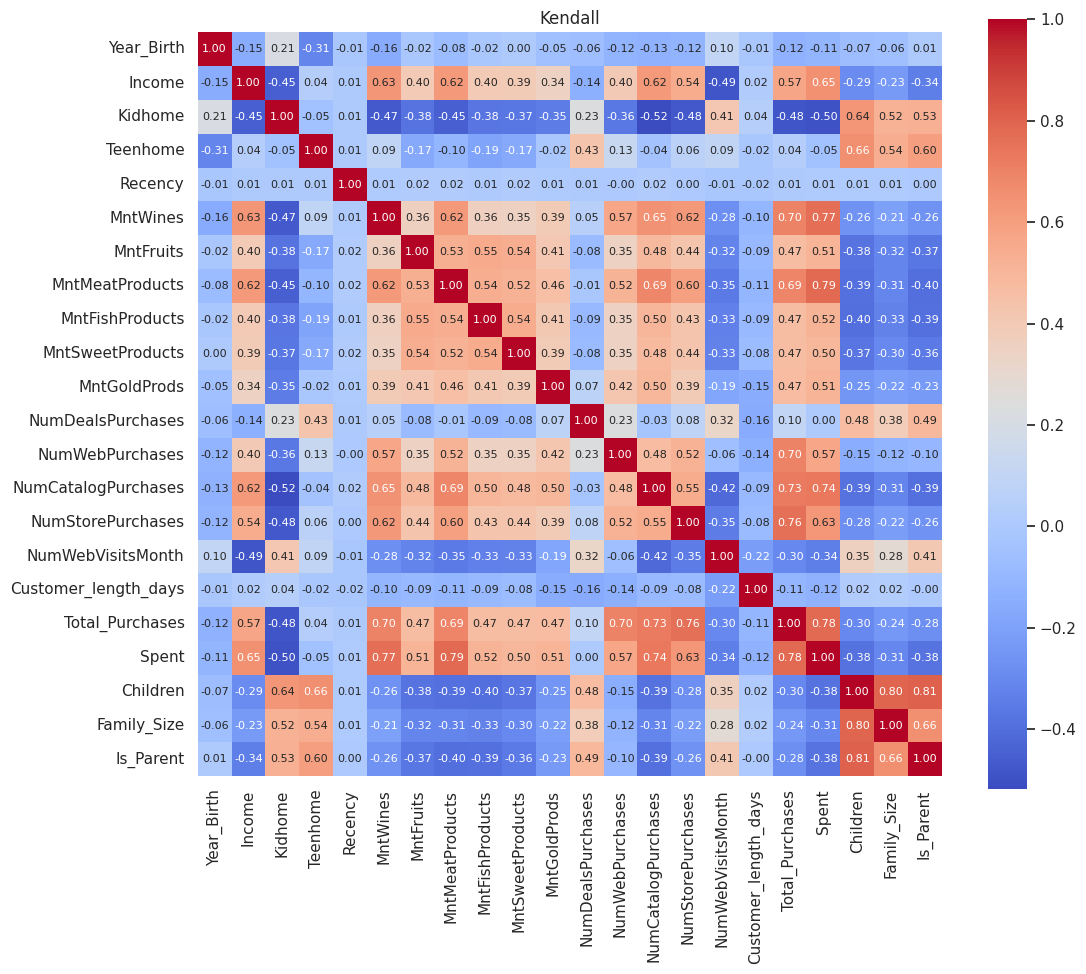

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 8}, fmt = '.2f')
plt.title('Pearson')
plt.show()
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(method = 'spearman'), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 8}, fmt = '.2f')
plt.title('Spearman')
plt.show()
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(method = 'kendall'), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 8}, fmt = '.2f')
plt.title('Kendall')
plt.show()
None

## Continuous Features

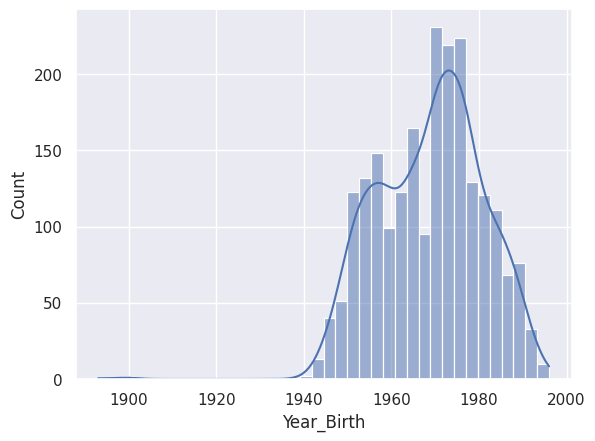

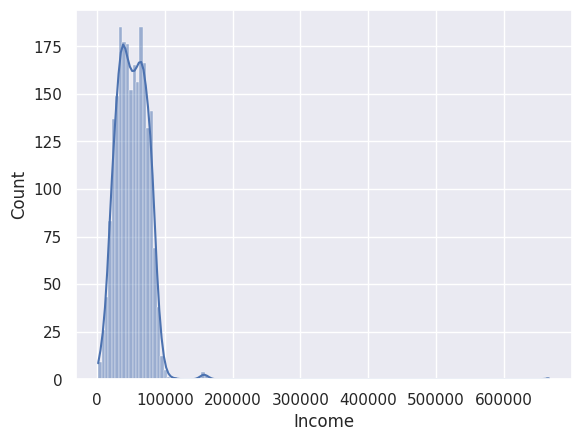

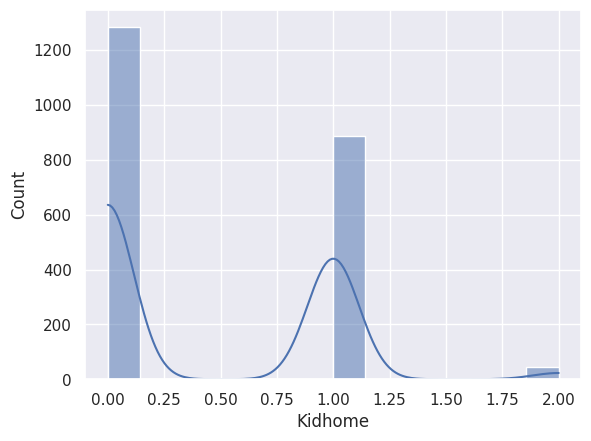

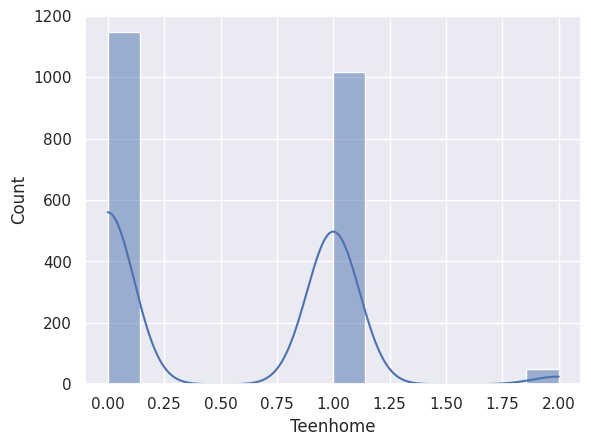

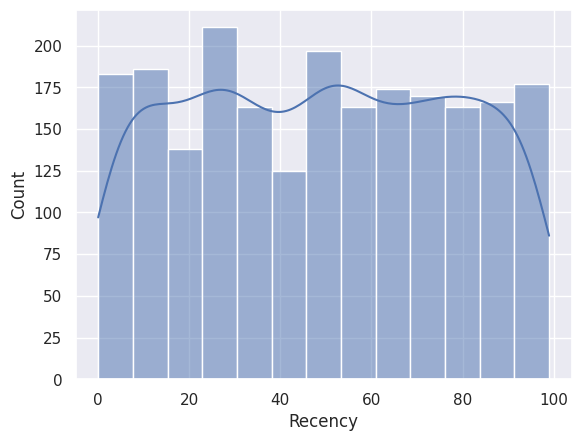

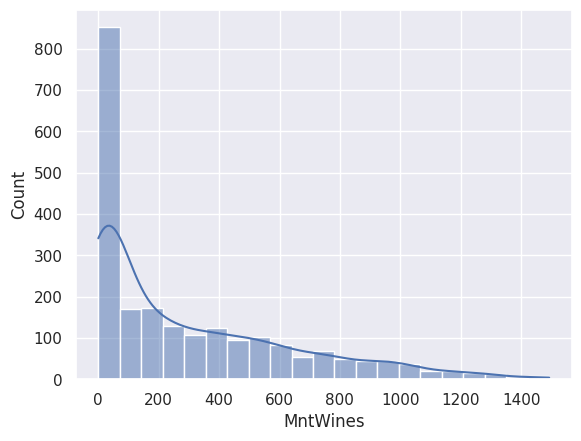

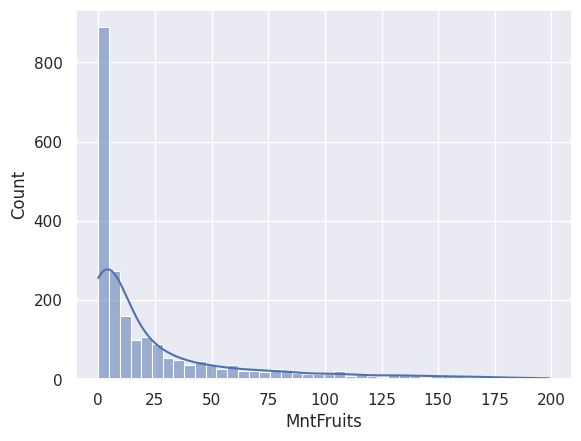

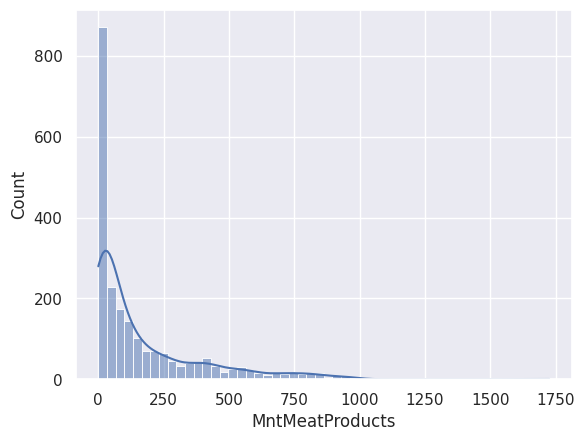

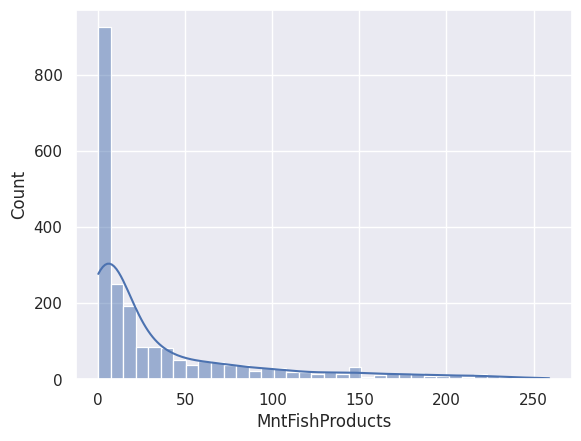

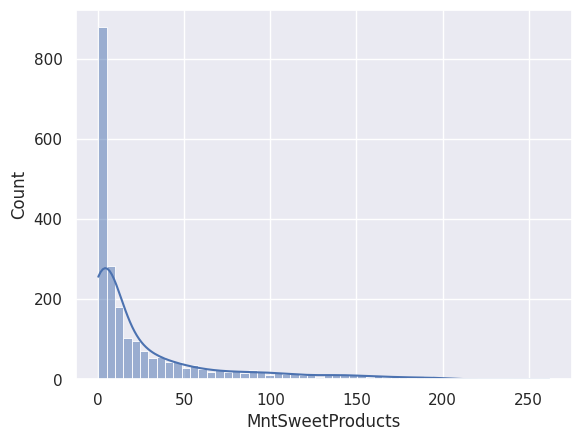

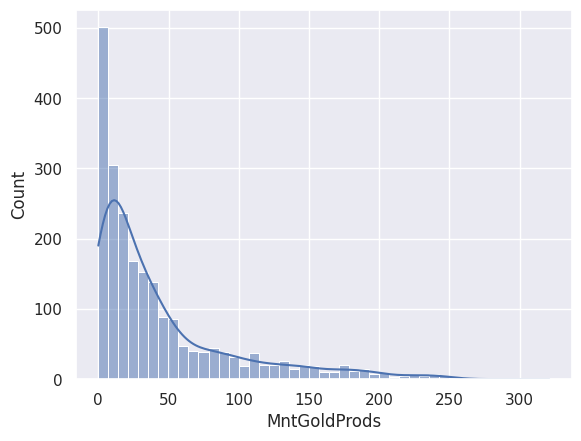

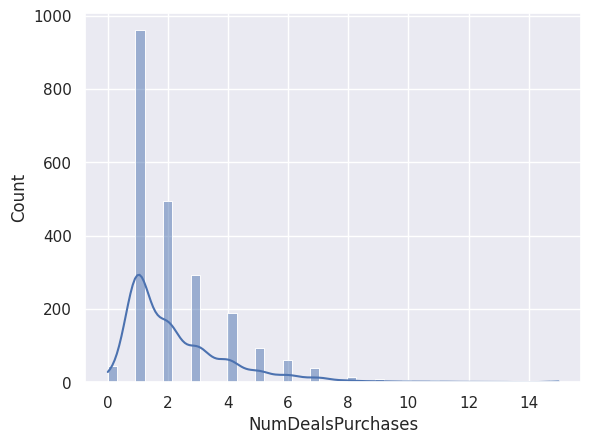

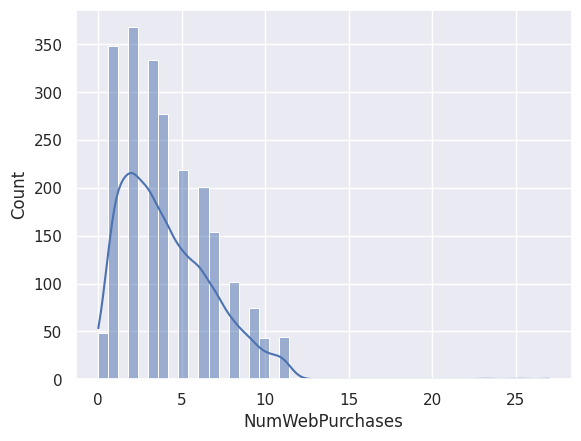

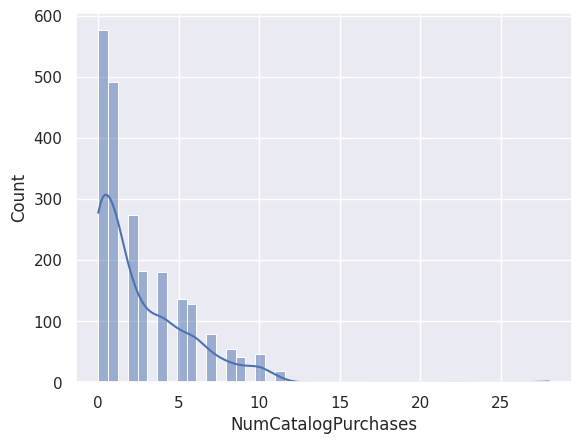

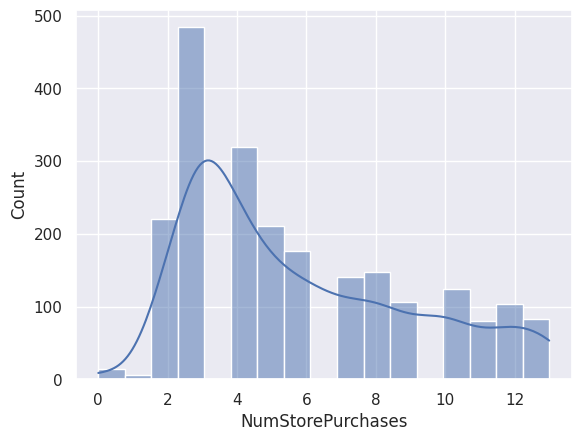

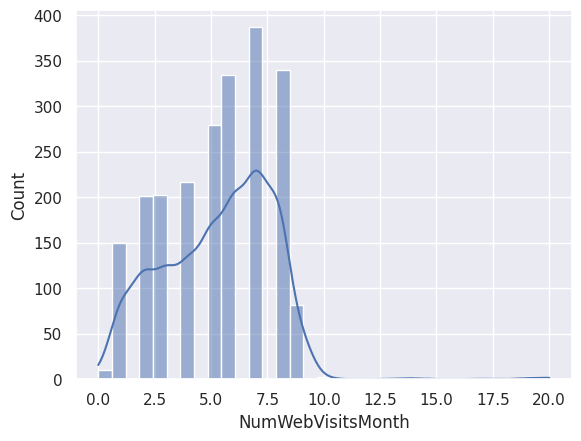

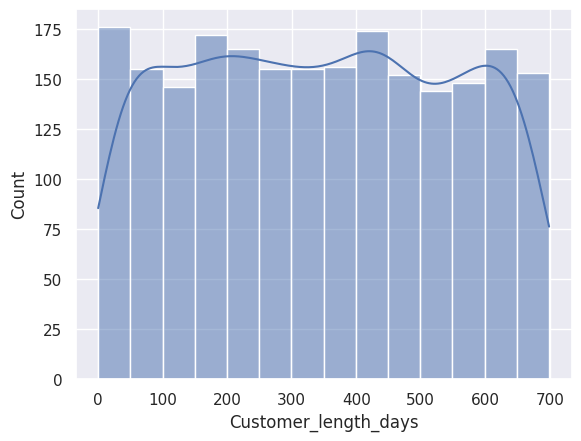

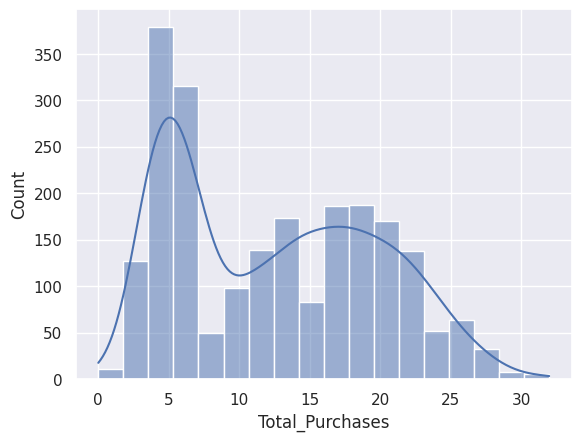

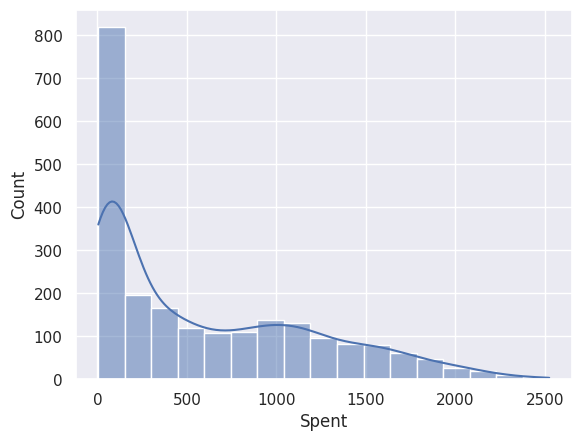

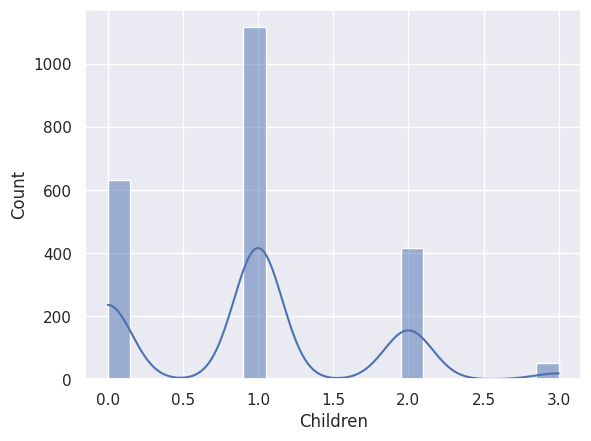

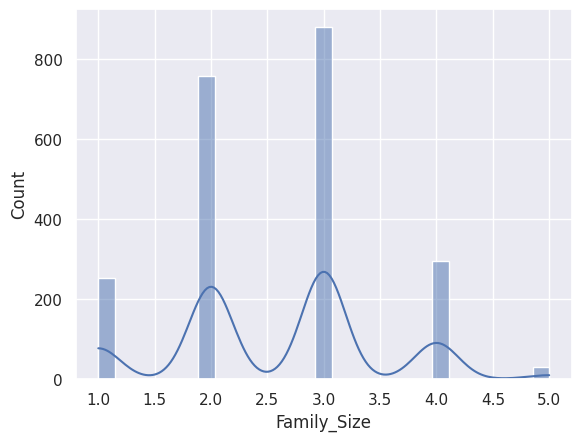

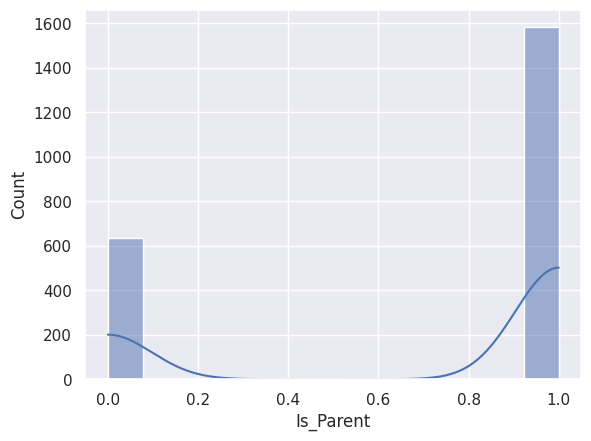

In [ ]:
for feat in cts_feat:
    sns.histplot(df, x = feat, kde = True)
    plt.show()

remove outliers

In [ ]:
df = df[df['Year_Birth'] > 1920]

In [ ]:
df = df[df['Income'] < 300_000]

In [ ]:
df.shape

(2212, 31)

In [ ]:
# df['Kids'] = df['Kidhome'] + df['Teenhome']

In [ ]:
# df.drop(['Kidhome', 'Teenhome'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Customer_length_days', 'Total_Purchases', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

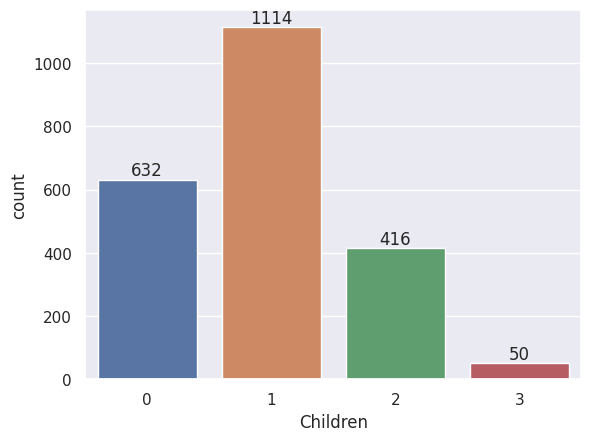

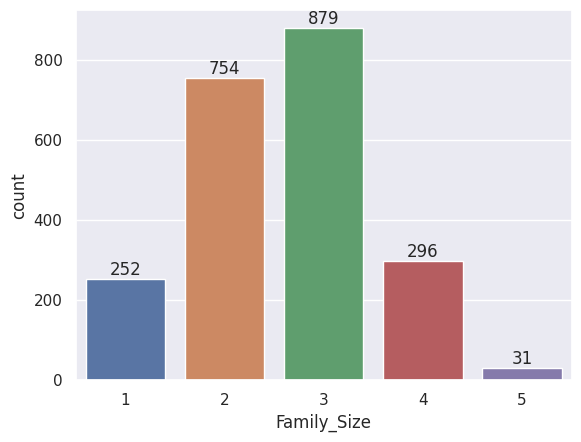

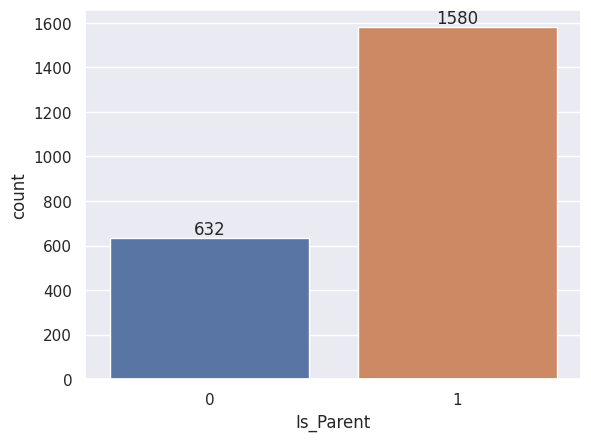

In [ ]:
feats = ['Children','Family_Size', 'Is_Parent']
for feat in feats:
    ax = sns.countplot(df, x = feat)
    ax.bar_label(ax.containers[0])
    plt.show()

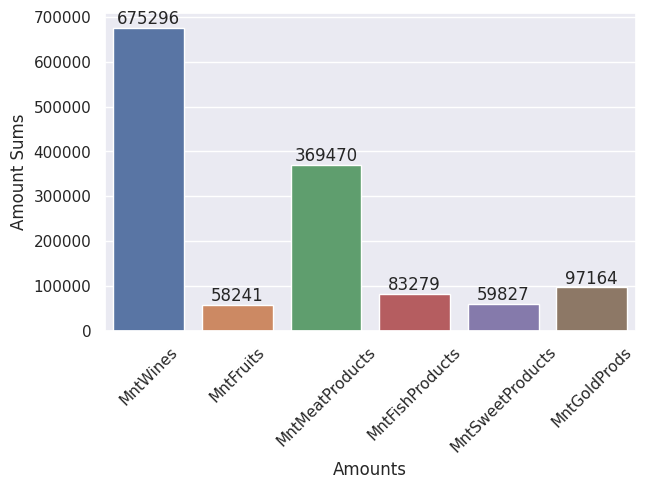

In [ ]:
amounts = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']
amounts_sum = [df[feat].sum() for feat in amounts]
ax = sns.barplot(x = amounts, y = amounts_sum)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Amounts')
plt.ylabel('Amount Sums')
plt.show()

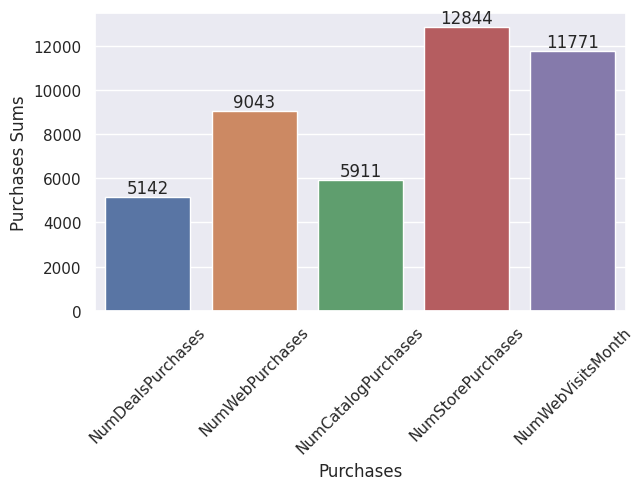

In [ ]:
purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
             'NumStorePurchases', 'NumWebVisitsMonth']
purchases_sum = [df[feat].sum() for feat in purchases]
ax = sns.barplot(x = purchases, y = purchases_sum
# ,order =
)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Purchases')
plt.ylabel('Purchases Sums')
plt.show()

## Categorical Features

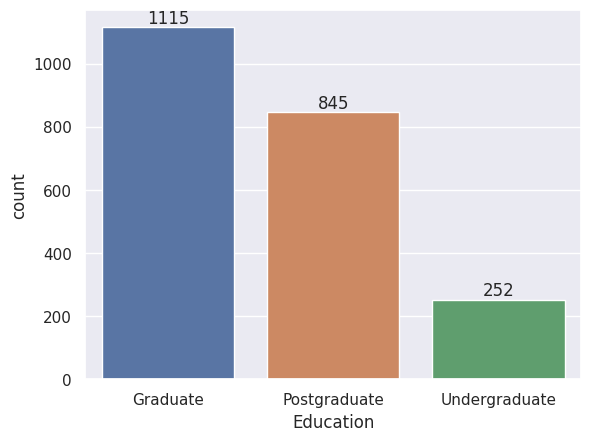

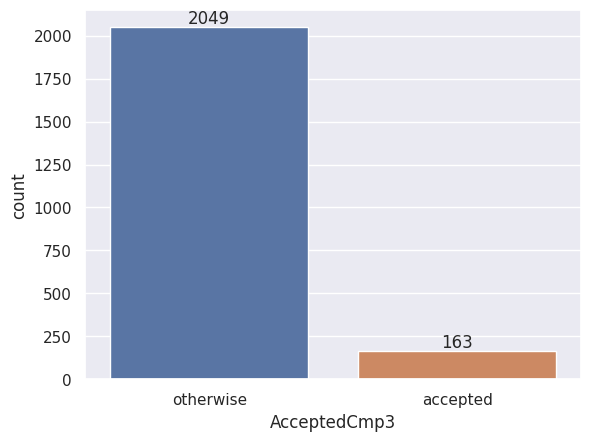

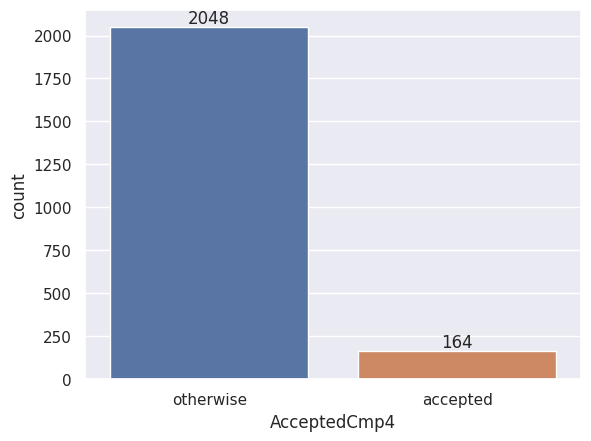

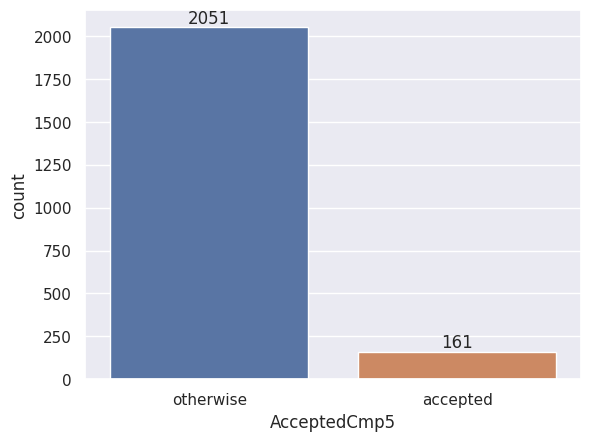

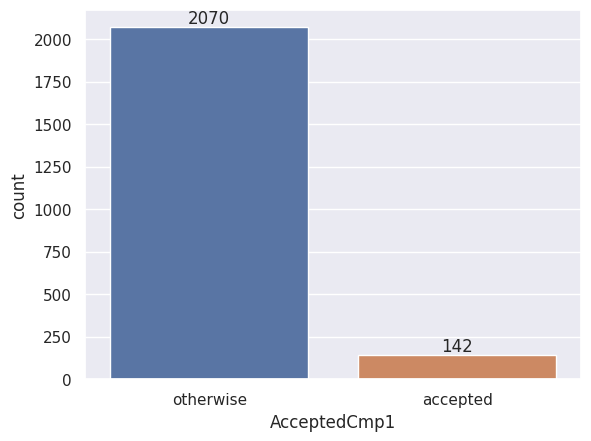

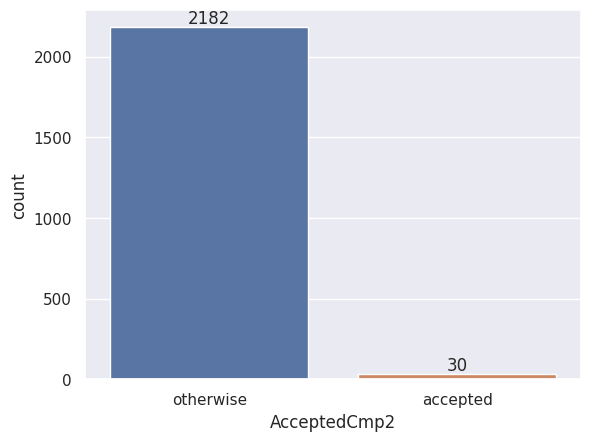

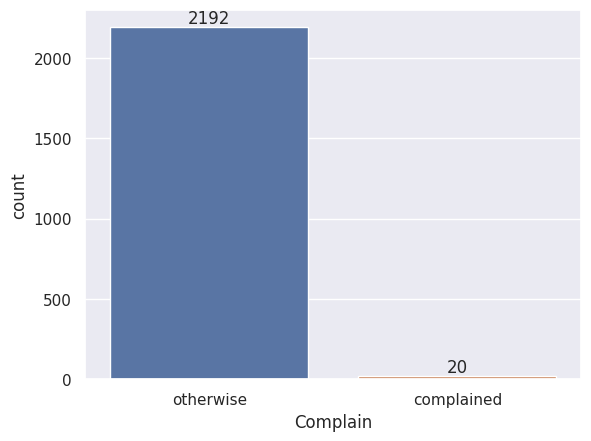

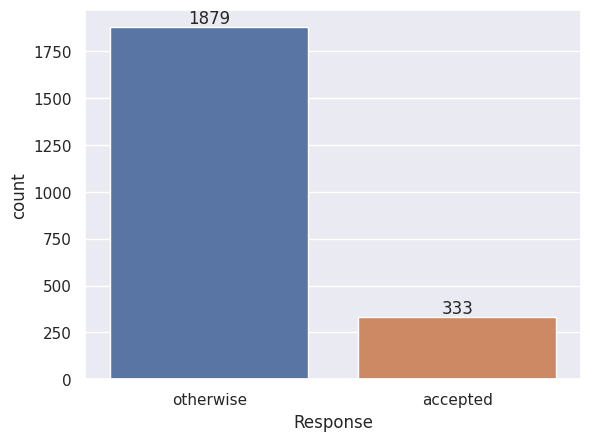

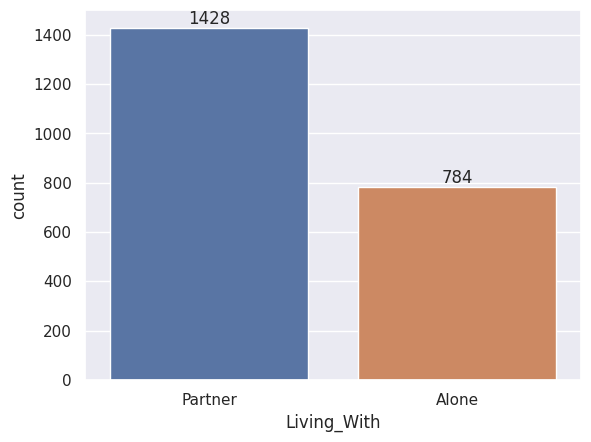

In [ ]:
for feat in cat_feat:
    ax = sns.countplot(df, x = feat,
            order = df[feat].value_counts().sort_values(ascending=False).index)
    ax.bar_label(ax.containers[0])
    plt.show()

In [ ]:
# df['Marital_Status'].replace({'Alone': 'Single', 'Absurd': 'Single', 'YOLO': 'Single'},
#                              inplace = True)

In [ ]:
# df['Marital_Status'].value_counts()

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Customer_length_days', 'Total_Purchases', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

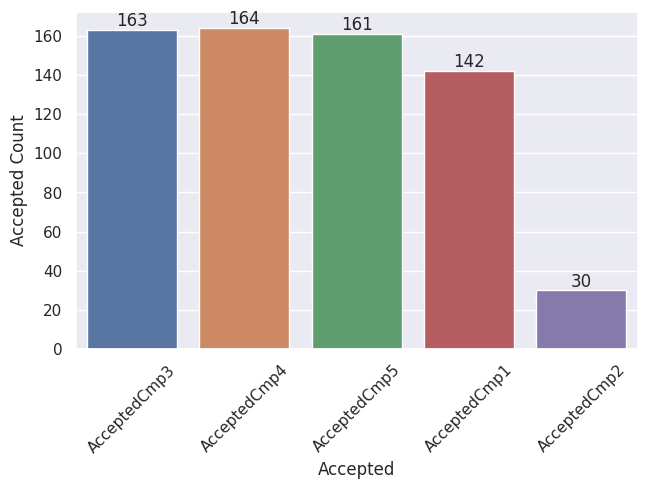

In [ ]:
accepted = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2']
accepted_count = [(df[feat] == 'accepted').sum() for feat in accepted]
ax = sns.barplot(x = accepted, y = accepted_count
# ,order =
)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.tight_layout()
plt.xlabel('Accepted')
plt.ylabel('Accepted Count')
plt.show()

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
       'Customer_length_days', 'Total_Purchases', 'Spent', 'Living_With',
       'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [ ]:
AcceptedCmp = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2'
              , 'AcceptedCmp1']
for feat in AcceptedCmp:
    df[feat] = df[feat].replace({'accepted':1, 'otherwise':0})

In [ ]:
AcceptedCmp = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2']
df['AcceptedPromo'] = df['AcceptedCmp1']
for feat in AcceptedCmp:
    df['AcceptedPromo'] += df[feat]
df['AcceptedPromo'] = np.where(df['AcceptedPromo']>0, 1, 0)

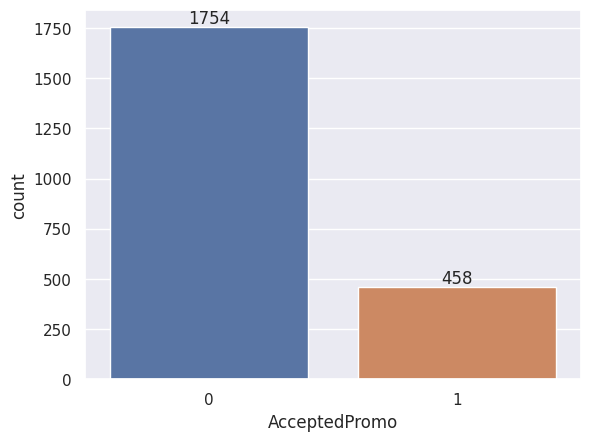

In [ ]:
ax= sns.countplot(df, x = 'AcceptedPromo')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
AcceptedCmp = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2'
              , 'AcceptedCmp1']
for feat in AcceptedCmp:
    df.drop([feat], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Customer_length_days',
       'Total_Purchases', 'Spent', 'Living_With', 'Children', 'Family_Size',
       'Is_Parent', 'AcceptedPromo'],
      dtype='object')

## Data Transformation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_curve, auc, r2_score, mean_squared_error
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

SEED = 0

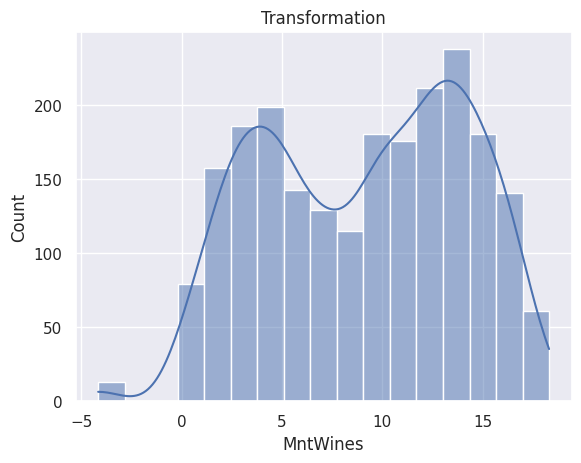

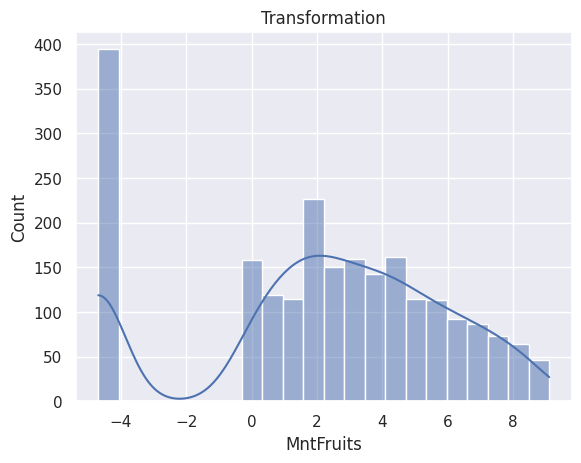

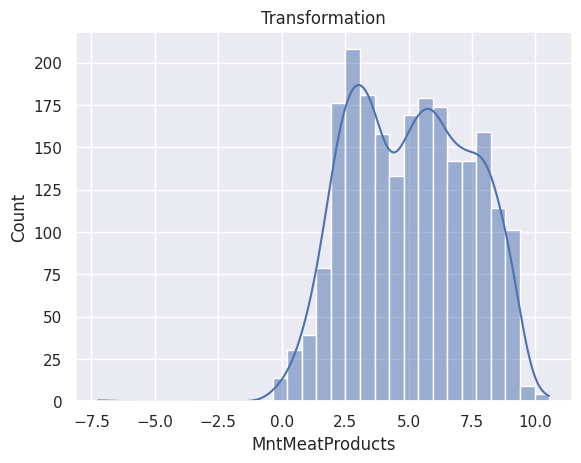

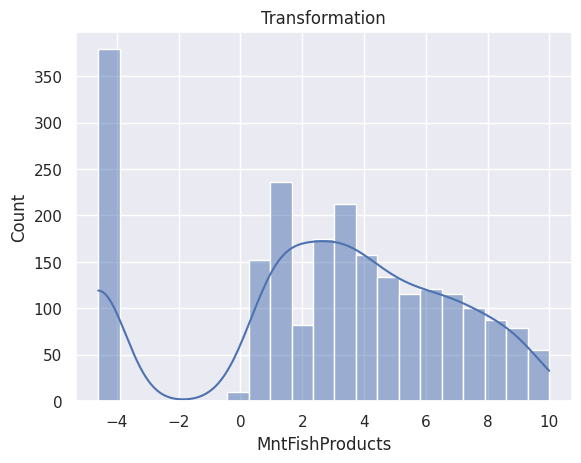

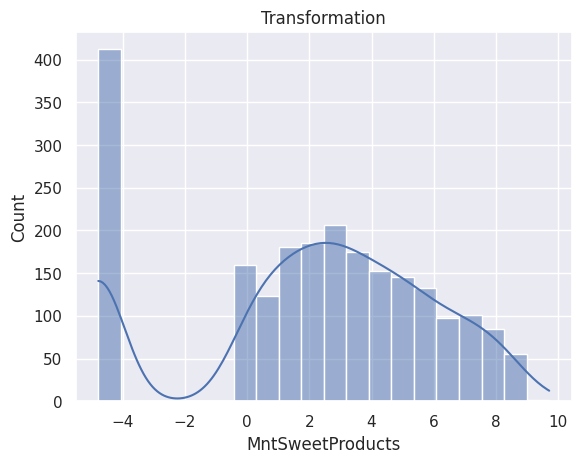

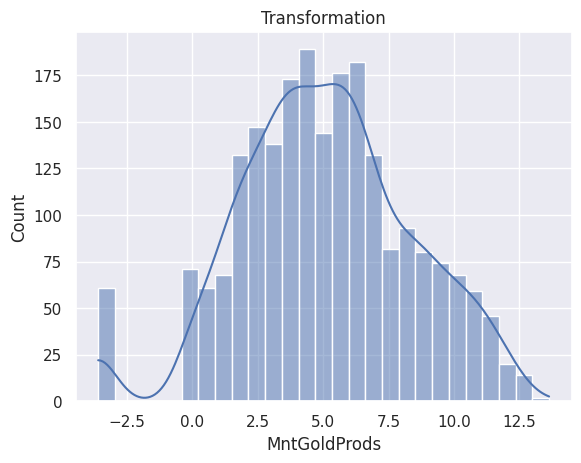

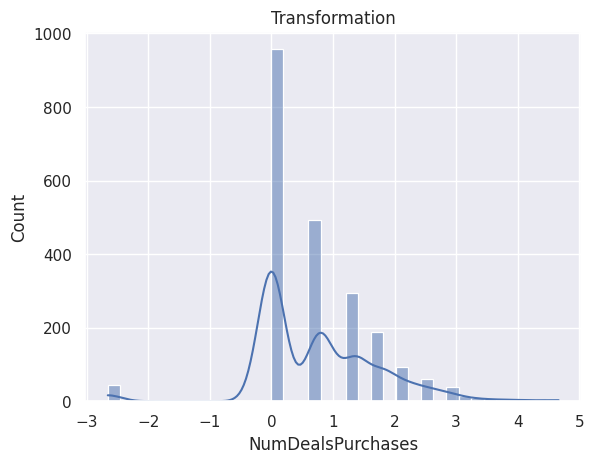

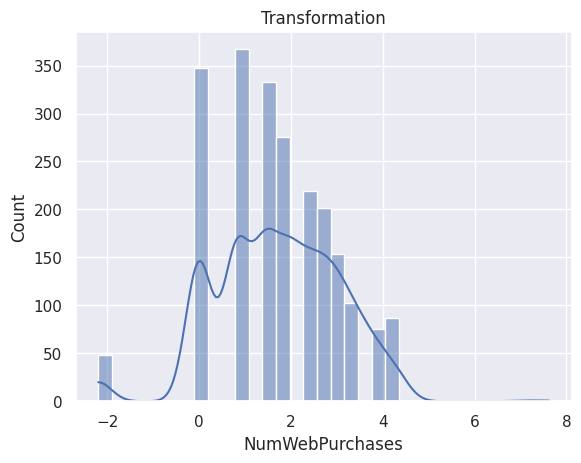

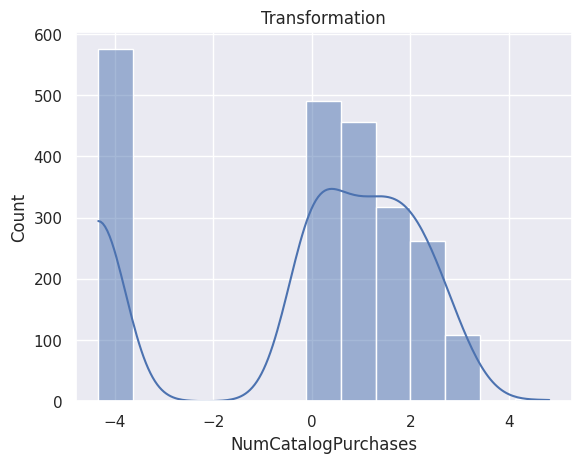

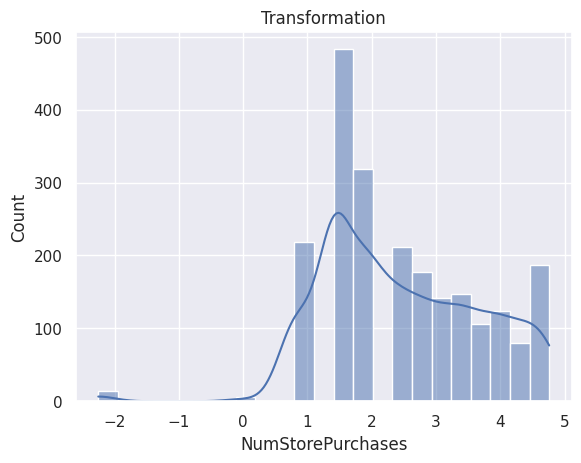

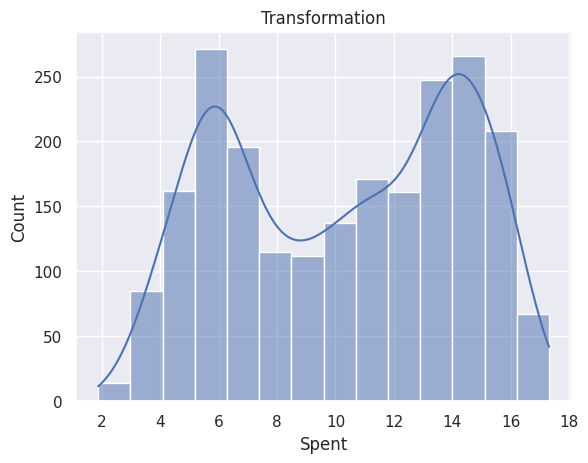

In [ ]:
features_tra = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Spent']
for feat in features_tra:
    sns.histplot(scipy.stats.boxcox(df[feat] + 1e-5)[0], kde = True)
    # sns.histplot(np.log(df[feat] + 1e-5), kde = True)
    plt.xlabel(f'{feat}')
    plt.title('Transformation')
    plt.show()

In [ ]:
features_tra = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Spent']
for feat in features_tra:
    # df[f'{feat}_tr'] = scipy.stats.boxcox(df[feat] + 1e-5)[0]
    # df.drop(df[feat], axis = 1, inplace = True)
    df[feat] = scipy.stats.boxcox(df[feat] + 1e-5)[0]

In [ ]:
# sns.histplot(df, x = 'MntWines', kde = True)
# plt.show()

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Customer_length_days',
       'Total_Purchases', 'Spent', 'Living_With', 'Children', 'Family_Size',
       'Is_Parent', 'AcceptedPromo'],
      dtype='object')

In [ ]:
cts_feat = df.select_dtypes(include=[np.number]).columns
cat_feat = df.select_dtypes(include = ['object']).columns

In [ ]:
cts_feat

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Customer_length_days', 'Total_Purchases', 'Spent', 'Children',
       'Family_Size', 'Is_Parent', 'AcceptedPromo'],
      dtype='object')

In [ ]:
cat_feat

Index(['Education', 'Complain', 'Response', 'Living_With'], dtype='object')

In [ ]:
print(cts_feat.shape, cat_feat.shape, df.columns.shape)

(23,) (4,) (27,)


In [ ]:
ct = ColumnTransformer(
    [("scaling", MinMaxScaler(), cts_feat),
     ("onehot", OneHotEncoder(handle_unknown='ignore', drop = 'if_binary'), cat_feat)])

In [ ]:
X = ct.fit_transform(df)

In [ ]:
ct.get_feature_names_out()

array(['scaling__Year_Birth', 'scaling__Income', 'scaling__Kidhome',
       'scaling__Teenhome', 'scaling__Recency', 'scaling__MntWines',
       'scaling__MntFruits', 'scaling__MntMeatProducts',
       'scaling__MntFishProducts', 'scaling__MntSweetProducts',
       'scaling__MntGoldProds', 'scaling__NumDealsPurchases',
       'scaling__NumWebPurchases', 'scaling__NumCatalogPurchases',
       'scaling__NumStorePurchases', 'scaling__NumWebVisitsMonth',
       'scaling__Customer_length_days', 'scaling__Total_Purchases',
       'scaling__Spent', 'scaling__Children', 'scaling__Family_Size',
       'scaling__Is_Parent', 'scaling__AcceptedPromo',
       'onehot__Education_Graduate', 'onehot__Education_Postgraduate',
       'onehot__Education_Undergraduate', 'onehot__Complain_otherwise',
       'onehot__Response_otherwise', 'onehot__Living_With_Partner'],
      dtype=object)

In [ ]:
ct.get_feature_names_out().shape

(29,)

# Dimentional Reduction + Clustering

Here we implement dimentional reduction and clustering via a pipeline. A random search cross validation is performed to tune hyperparameters.

In [ ]:
pipeline = Pipeline([
    ('kernel_pca', KernelPCA()),
    # ('cluster', DBSCAN())
    # ('cluster', SpectralClustering())
    ('cluster', AgglomerativeClustering())
])

param_distributions = {
    'kernel_pca__n_components': np.arange(2, 5+1, 1),
    'kernel_pca__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'cluster__n_clusters': np.arange(2, 5+1, 1) ## for clustering
}


def silhouette_scorer(estimator, X):
    estimator.fit(X)
    labels = estimator.named_steps['cluster'].labels_
    if len(set(labels)) > 1:  # Ensure there is more than one cluster
        return silhouette_score(X, labels)
    else:
        return -1  # Return a negative score if there's only one cluster

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=50,
    scoring=silhouette_scorer,
    cv=3,
    verbose=4,
    random_state= SEED
)

random_search.fit(X)

print("Best parameters:", random_search.best_params_)
print("Best silhouette score:", random_search.best_score_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END cluster__n_clusters=4, kernel_pca__kernel=sigmoid, kernel_pca__n_components=3;, score=0.162 total time=   0.2s
[CV 2/3] END cluster__n_clusters=4, kernel_pca__kernel=sigmoid, kernel_pca__n_components=3;, score=0.169 total time=   0.2s
[CV 3/3] END cluster__n_clusters=4, kernel_pca__kernel=sigmoid, kernel_pca__n_components=3;, score=0.157 total time=   0.2s
[CV 1/3] END cluster__n_clusters=3, kernel_pca__kernel=sigmoid, kernel_pca__n_components=3;, score=0.191 total time=   0.2s
[CV 2/3] END cluster__n_clusters=3, kernel_pca__kernel=sigmoid, kernel_pca__n_components=3;, score=0.187 total time=   0.2s
[CV 3/3] END cluster__n_clusters=3, kernel_pca__kernel=sigmoid, kernel_pca__n_components=3;, score=0.183 total time=   0.2s
[CV 1/3] END cluster__n_clusters=4, kernel_pca__kernel=rbf, kernel_pca__n_components=5;, score=0.188 total time=   0.2s
[CV 2/3] END cluster__n_clusters=4, kernel_pca__kernel=rbf, kernel_pca__n_

In [ ]:
best_pipeline = random_search.best_estimator_

best_pipeline.fit(X)

labels = best_pipeline.named_steps['cluster'].labels_

n_clusters = len(set(labels))
print("Number of clusters found:", n_clusters)

Number of clusters found: 5


# Clustering (Only)

In this section only clustering is performed (and no dimentional reduction). Instead of using some search method to find the desired number of clusters (hyperparameter tuning), silhouette scores are calculate for various number of clusters. The highest is the best canidate to try.

For n_clusters = 2, the Silhouette Coefficient is: 0.17762954516947974
For n_clusters = 3, the Silhouette Coefficient is: 0.17657146056728995
For n_clusters = 4, the Silhouette Coefficient is: 0.21406210299056738
For n_clusters = 5, the Silhouette Coefficient is: 0.21967322114286836
For n_clusters = 6, the Silhouette Coefficient is: 0.15939255303601083
For n_clusters = 7, the Silhouette Coefficient is: 0.16565565736127366
For n_clusters = 8, the Silhouette Coefficient is: 0.15758324298777218
For n_clusters = 9, the Silhouette Coefficient is: 0.16109840198011877
For n_clusters = 10, the Silhouette Coefficient is: 0.1704803620391619
For n_clusters = 11, the Silhouette Coefficient is: 0.16944261372363592
For n_clusters = 12, the Silhouette Coefficient is: 0.17615407040683304
For n_clusters = 13, the Silhouette Coefficient is: 0.1737013581669011
For n_clusters = 14, the Silhouette Coefficient is: 0.17384903254798711
For n_clusters = 15, the Silhouette Coefficient is: 0.17805822219569897


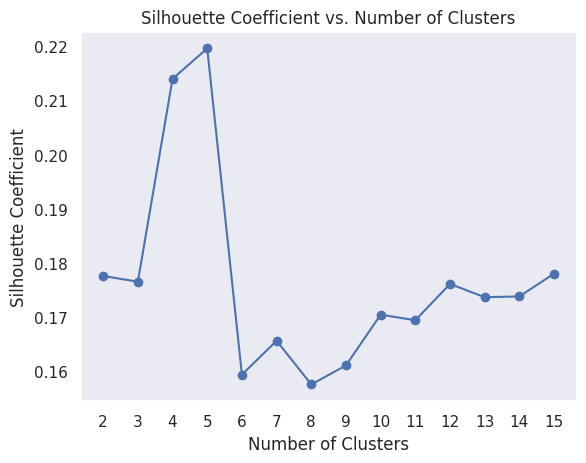

In [ ]:
range_n_clusters = range(2, 15+1)
silhouette_scores = []


for n_clusters in range_n_clusters:
    # Apply K-means clustering
    # clust = KMeans(n_clusters=n_clusters, random_state=SEED)
    clust = AgglomerativeClustering(n_clusters=n_clusters)
    # clust = SpectralClustering(n_clusters=n_clusters, random_state = SEED)

    y_pred = clust.fit_predict(X)

    silhouette_avg = silhouette_score(X, y_pred)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, the Silhouette Coefficient is: {silhouette_avg}')


plt.figure()
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Coefficient vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.xticks(range_n_clusters)
plt.grid()
plt.show()

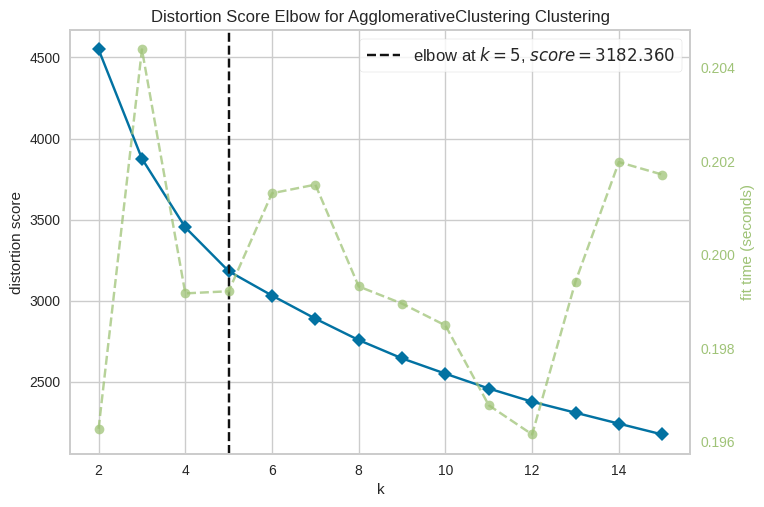

In [ ]:
## a way to check the results above
from yellowbrick.cluster import KElbowVisualizer
# Elbow_M = KElbowVisualizer(KMeans(), k=15)
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=15)
# Elbow_M = KElbowVisualizer(SpectralClustering(), k=15)
Elbow_M.fit(X)
Elbow_M.show()
None

In [ ]:
clust = AgglomerativeClustering(n_clusters=5)
# clust = SpectralClustering(n_clusters=5)
labels = clust.fit_predict(X)

In [ ]:
# dbscan = DBSCAN(eps=0.30, min_samples=5)
# labels = dbscan.fit_predict(X)
# n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
# print("Number of clusters found:", n_clusters)
# print("Number of non-clusters points:,", np.sum(labels == -1))

# Analyze Clusters

In [ ]:
df['labels'] = labels

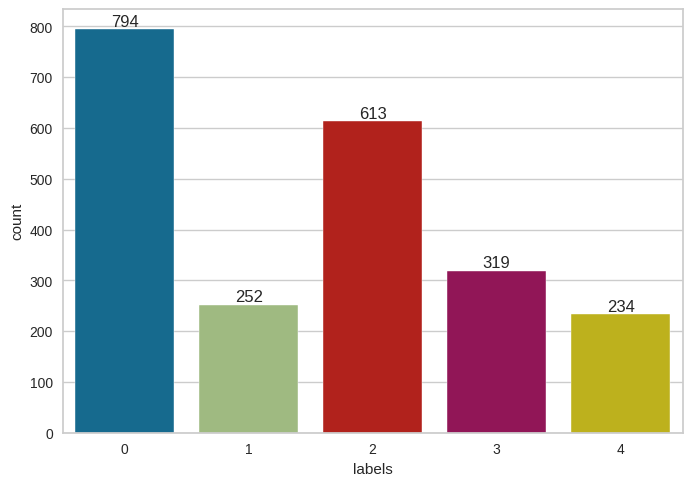

In [ ]:
ax = sns.countplot(df, x = 'labels')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
df.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Customer_length_days',
       'Total_Purchases', 'Spent', 'Living_With', 'Children', 'Family_Size',
       'Is_Parent', 'AcceptedPromo', 'labels'],
      dtype='object')

## Continuous vs. Labels

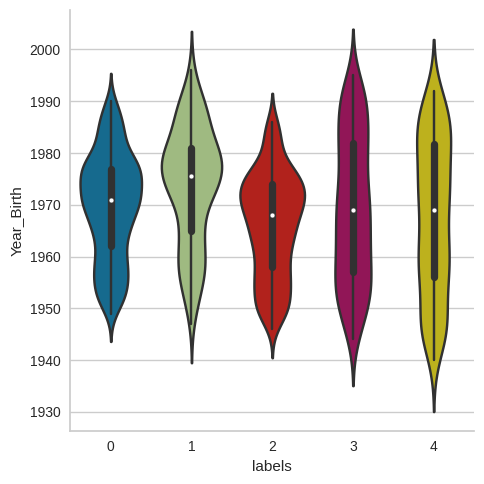

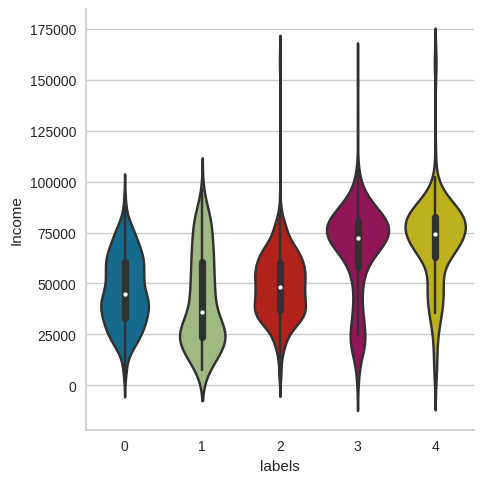

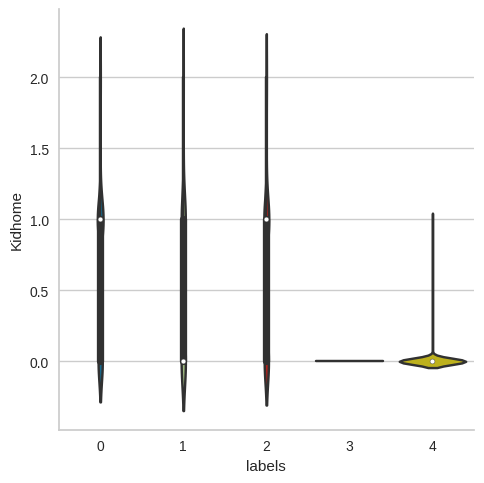

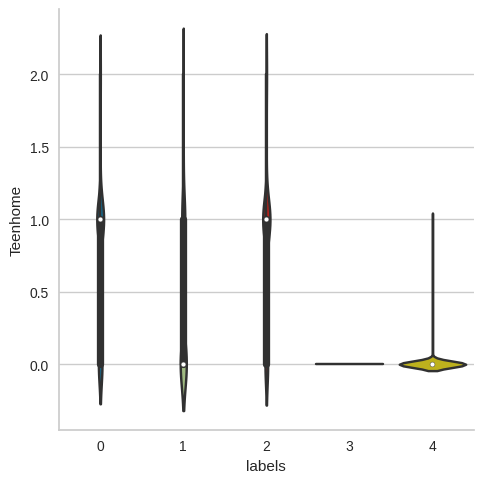

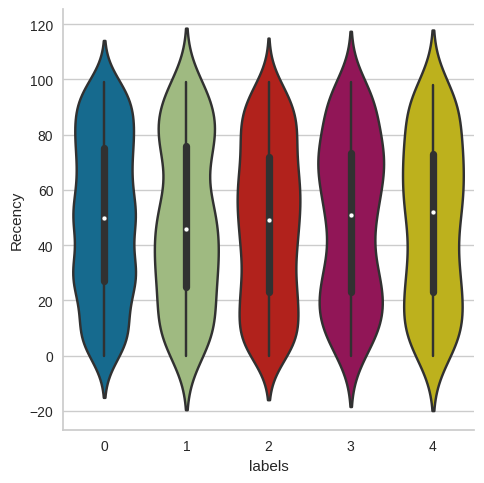

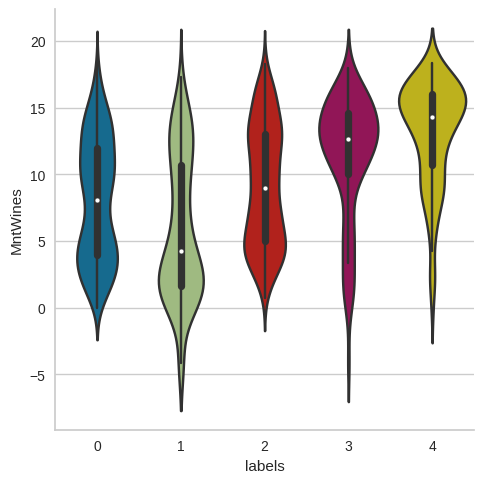

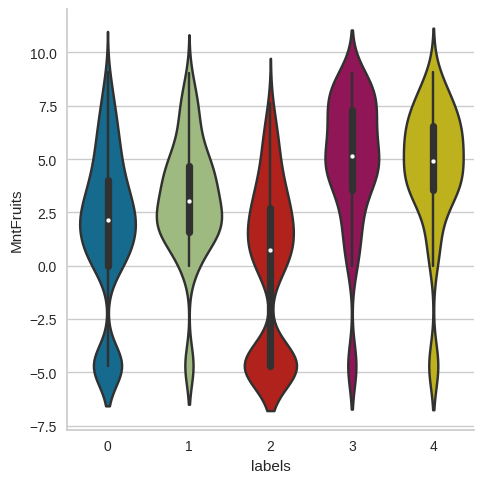

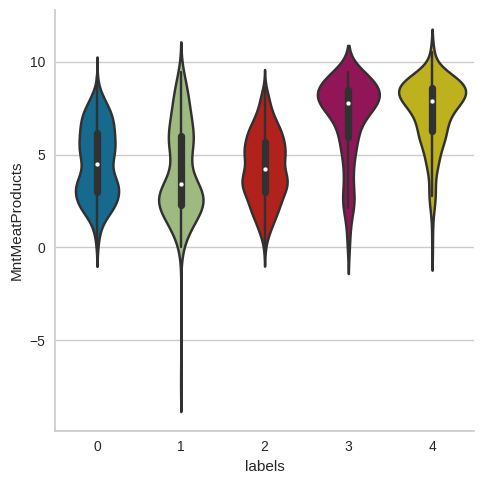

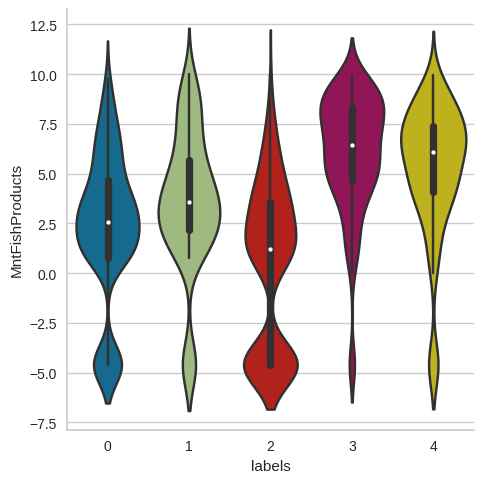

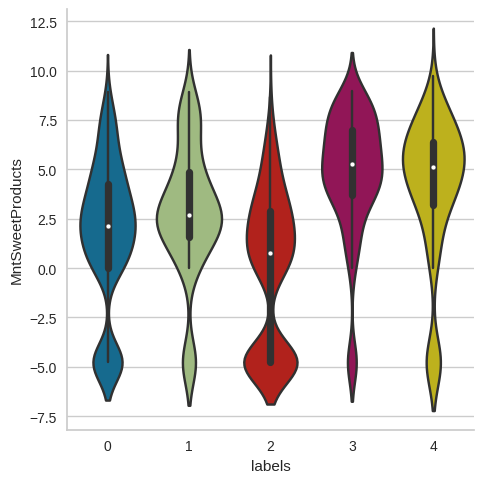

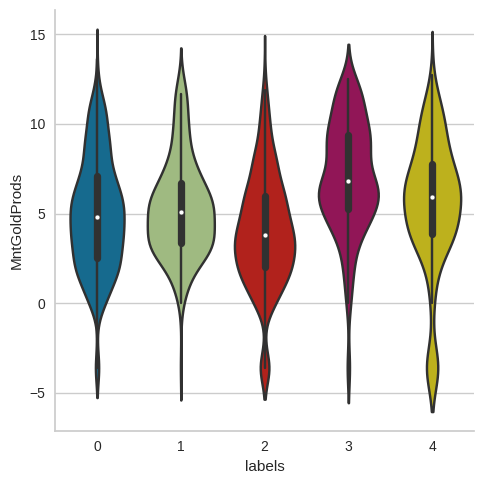

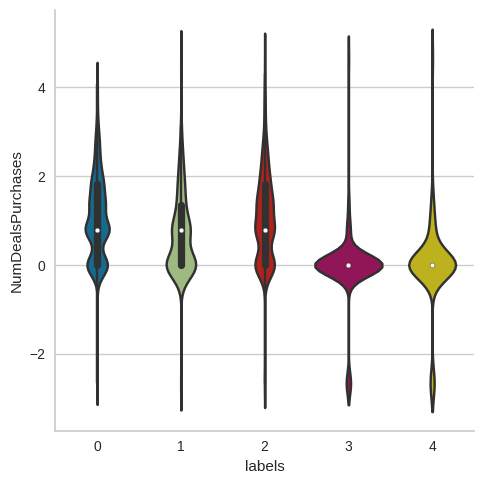

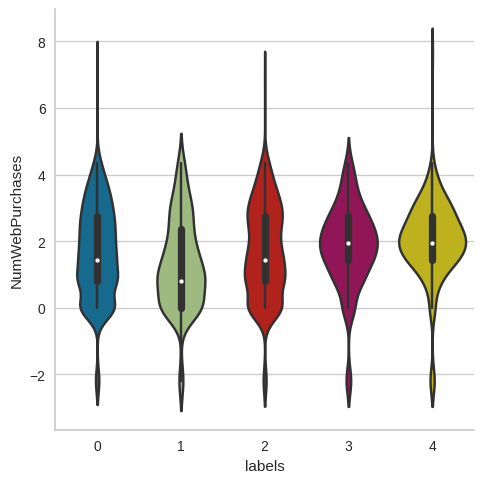

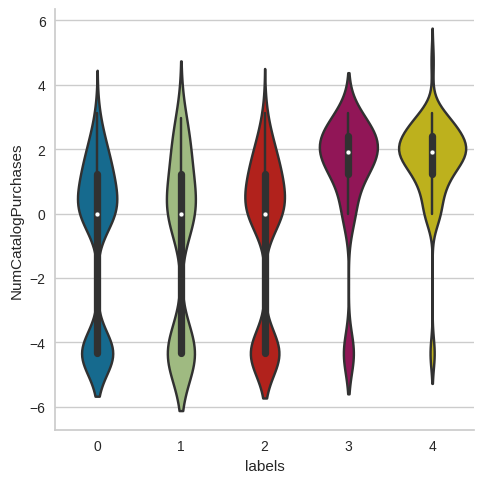

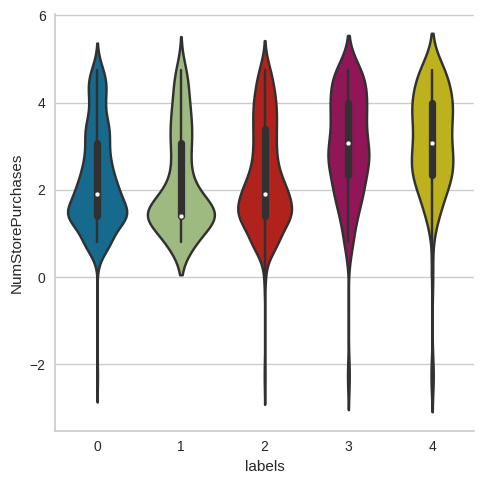

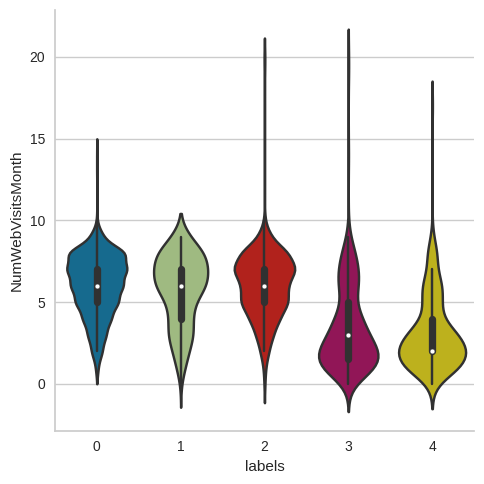

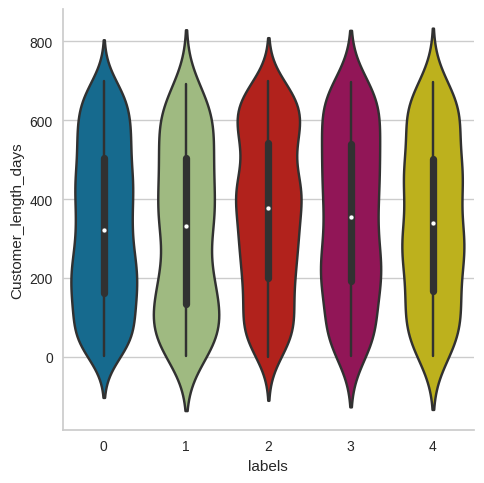

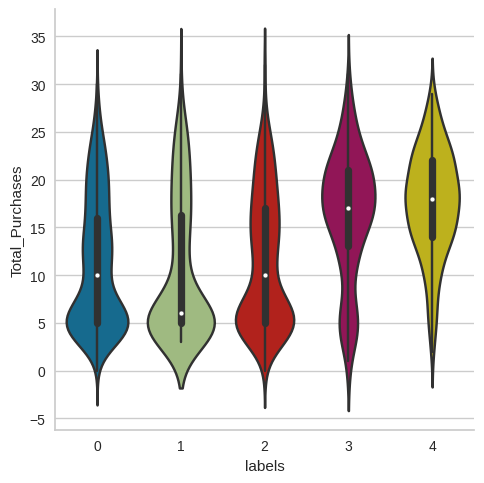

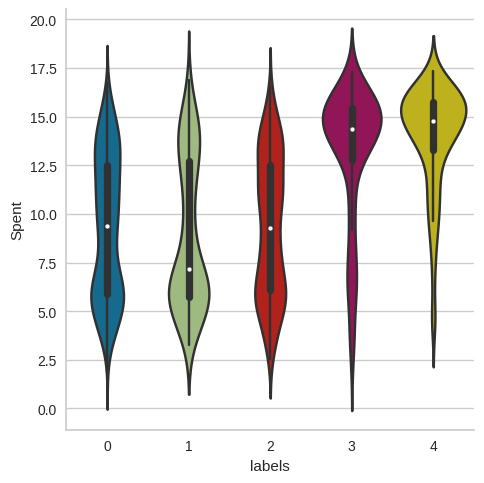

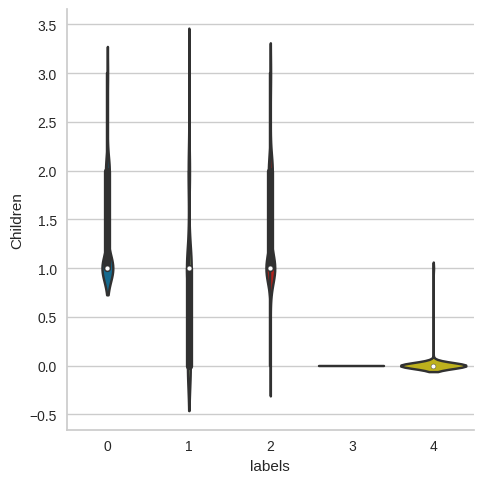

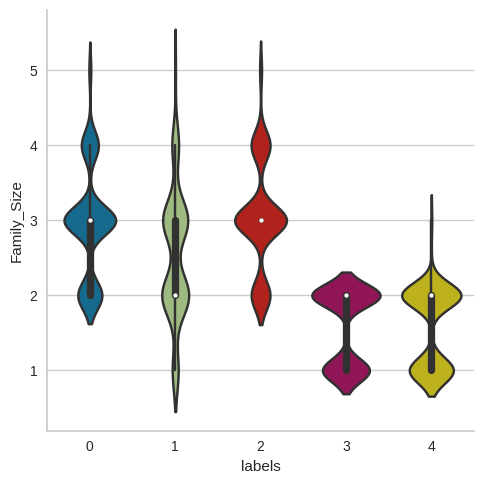

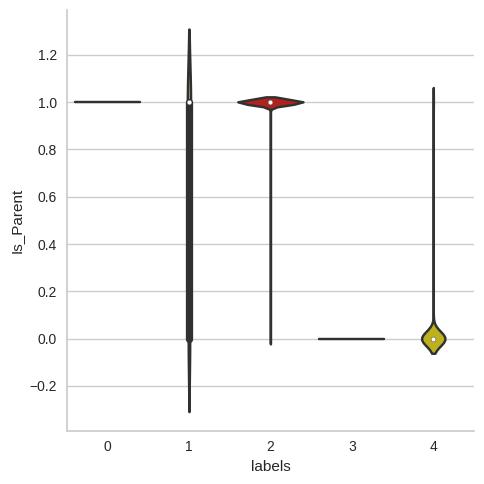

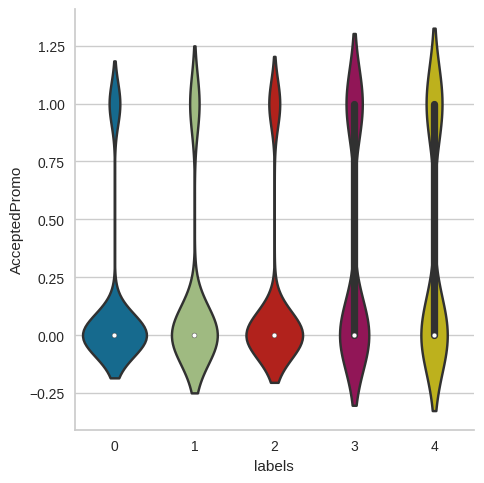

In [ ]:
for feat in cts_feat:
    # sns.histplot(df, x = feat, hue = 'labels', kde = True)
    # sns.boxplot(df, x = 'labels', y = feat)
    # sns.catplot(df, x = 'labels', y = feat, kind = 'boxen')
    sns.catplot(df, x = 'labels', y = feat, kind = 'violin')
    plt.show()

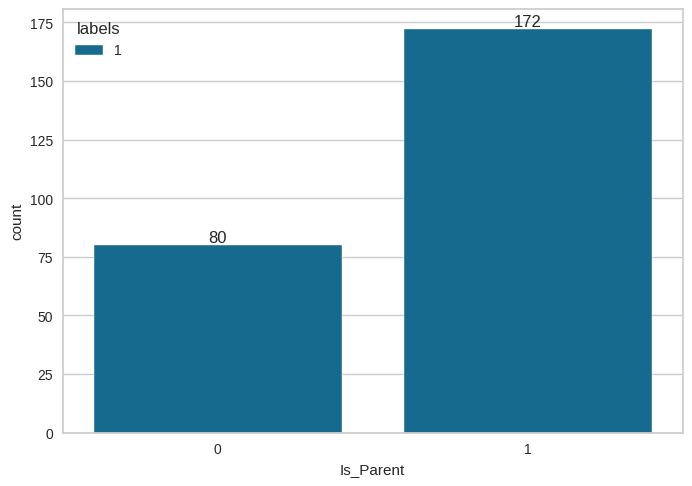

In [ ]:
Cluster1 = df[df['labels']==1]
ax = sns.countplot(Cluster1, x = 'Is_Parent', hue = 'labels')
ax.bar_label(ax.containers[0])
plt.show()

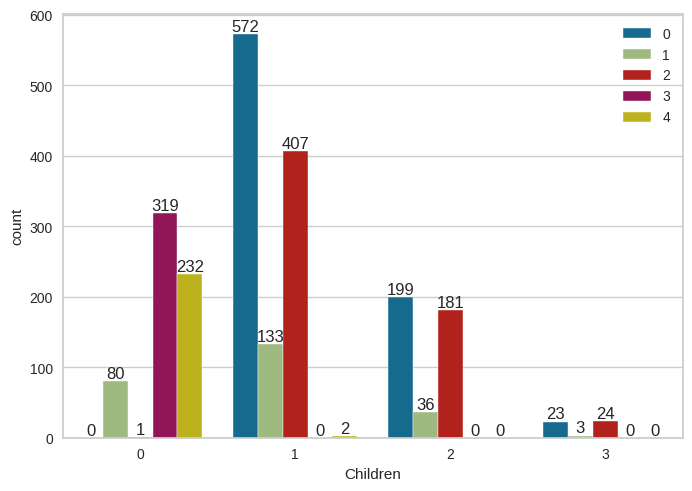

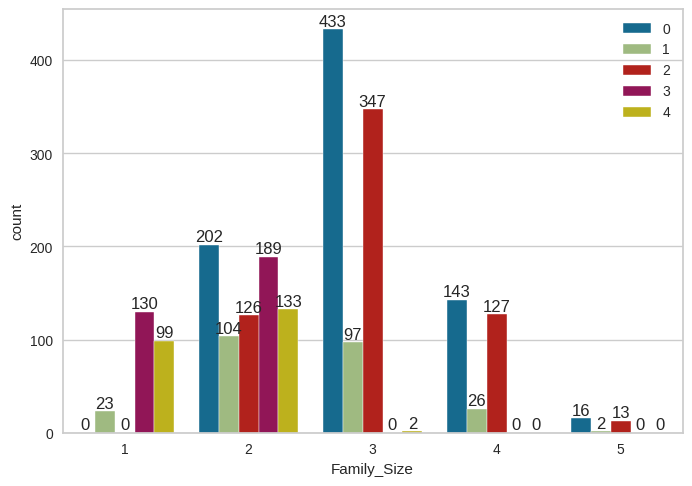

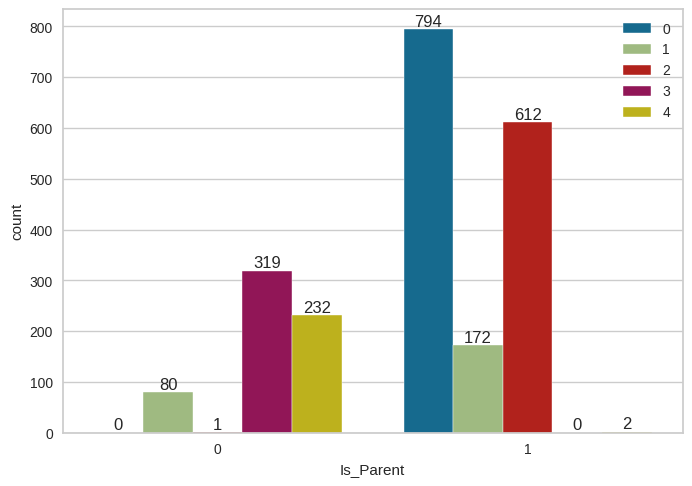

In [ ]:
# sns.countplot(df, x = 'Kids', hue = 'labels')

# sns.countplot(df, x = 'Children', hue = 'labels')
# plt.show()

feats = ['Children','Family_Size', 'Is_Parent']
for feat in feats:
    ax = sns.countplot(df, x = feat, hue = 'labels')
    # ax.bar_label(ax.containers[0])
    for container in ax.containers:
        ax.bar_label(container)
    plt.legend(loc='best')
    plt.show()

## Categorical vs Labels

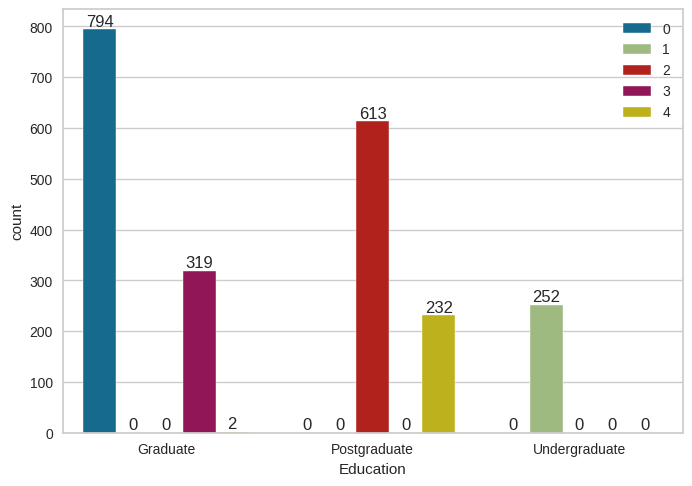

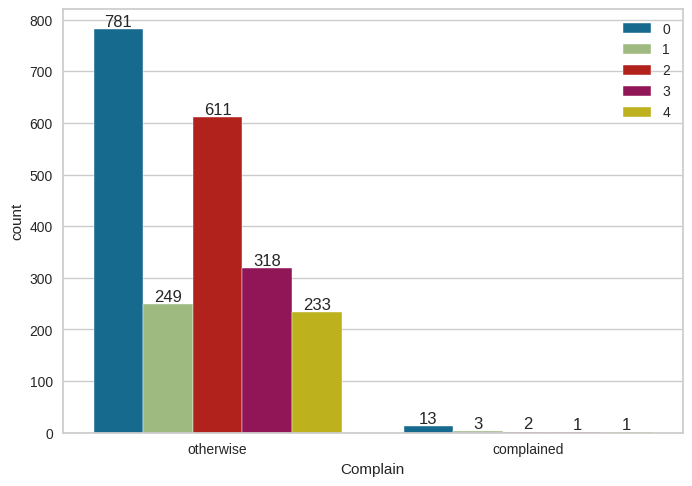

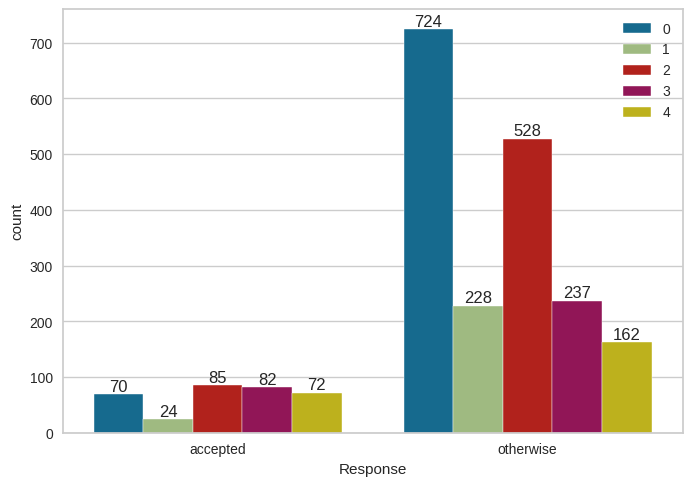

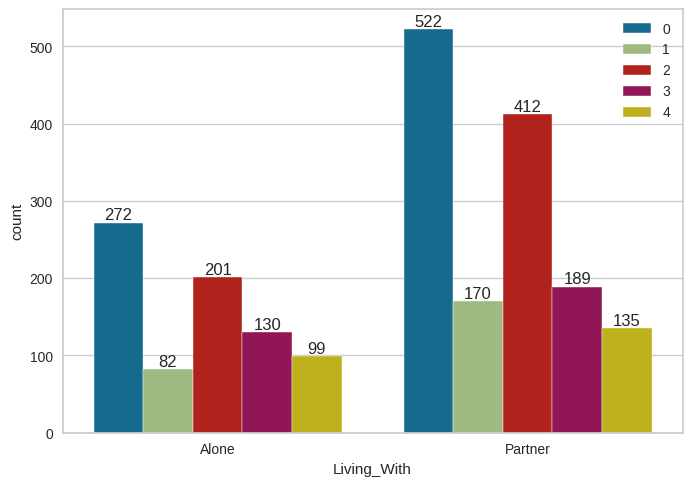

In [ ]:
for feat in cat_feat:
    ax = sns.countplot(df, x = feat, hue = 'labels'
            # ,order = df[feat].value_counts().sort_values(ascending=False).index
                      )
    # ax.bar_label(ax.containers[0])
    for container in ax.containers:
        ax.bar_label(container)
    plt.legend(loc='best')
    plt.show()

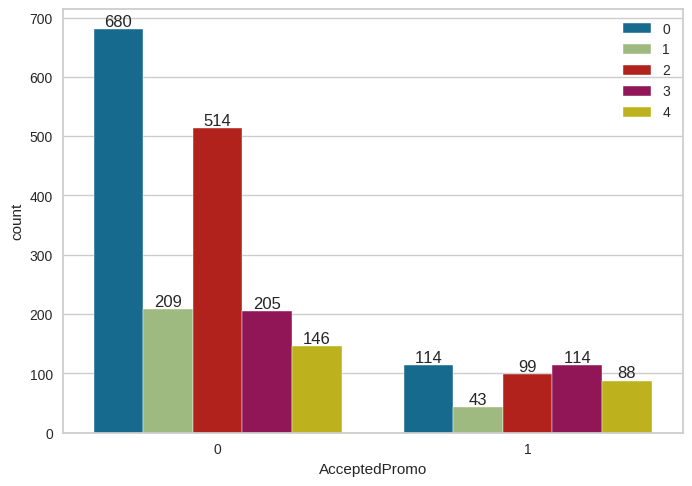

In [ ]:
ax = sns.countplot(df, x = 'AcceptedPromo', hue = 'labels')
# ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container)
plt.legend(loc='best')
plt.show()

# Discussion of Clusters

Clusters 3,4 tend to earn more income, make more purchases, and spend more money.
Cluster 3,4 contains people who are not parents.
Cluster 0,2 contains people who are parents.
Cluster 1 is more of a mix of parents and non-parents relative to the other clusters.
About 68% of people in cluster 1 are parents.
There is a big split on education as well.
Clusters 0,3 contain graduates.
Clusters 2,4 contain postgraduates.
Cluster 1 contains undergraduates.